<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#check-GPS-information" data-toc-modified-id="check-GPS-information-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>check GPS information</a></span></li><li><span><a href="#Select-a-subset-of-columns-to-keep" data-toc-modified-id="Select-a-subset-of-columns-to-keep-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Select a subset of columns to keep</a></span></li><li><span><a href="#creat-new-column-month,-elec_use,-elec_bill,-reshape-from-long-to-wide" data-toc-modified-id="creat-new-column-month,-elec_use,-elec_bill,-reshape-from-long-to-wide-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>creat new column <code>month</code>, <code>elec_use</code>, <code>elec_bill</code>, reshape from long to wide</a></span></li><li><span><a href="#rename-columns" data-toc-modified-id="rename-columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>rename columns</a></span></li><li><span><a href="#Merge-with-LandCover,-LandSurfaceTemperature,-VegetationField" data-toc-modified-id="Merge-with-LandCover,-LandSurfaceTemperature,-VegetationField-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Merge with LandCover, LandSurfaceTemperature, VegetationField</a></span></li><li><span><a href="#create-dummies-for-north,-summer,-new-building,-single-family-house" data-toc-modified-id="create-dummies-for-north,-summer,-new-building,-single-family-house-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>create dummies for north, summer, new building, single family house</a></span><ul class="toc-item"><li><span><a href="#create-dummy-for-north-china,-central,-south-china" data-toc-modified-id="create-dummy-for-north-china,-central,-south-china-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>create dummy for north china, central, south china</a></span></li><li><span><a href="#create-sumer-is_summer-dummy" data-toc-modified-id="create-sumer-is_summer-dummy-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>create <code>sumer</code> <code>is_summer</code> dummy</a></span></li><li><span><a href="#create-new-building-new-dummy" data-toc-modified-id="create-new-building-new-dummy-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>create new building <code>new</code> dummy</a></span></li><li><span><a href="#create-single-family-home-sf-dummy" data-toc-modified-id="create-single-family-home-sf-dummy-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>create single family home <code>sf</code> dummy</a></span></li></ul></li><li><span><a href="#generate-LC_Type3,-Vege_Cover" data-toc-modified-id="generate-LC_Type3,-Vege_Cover-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>generate <code>LC_Type3</code>, <code>Vege_Cover</code></a></span></li><li><span><a href="#clean-up-city-name" data-toc-modified-id="clean-up-city-name-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>clean up <code>city</code> name</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphs,-Degree-Days-Box-plot" data-toc-modified-id="Graphs,-Degree-Days-Box-plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Graphs, <code>Degree Days</code> Box plot</a></span></li><li><span><a href="#outliers-in-elec_use" data-toc-modified-id="outliers-in-elec_use-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>outliers in <code>elec_use</code></a></span><ul class="toc-item"><li><span><a href="#log-transformation" data-toc-modified-id="log-transformation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>log transformation</a></span></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#cross-sectional" data-toc-modified-id="cross-sectional-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>cross sectional</a></span></li><li><span><a href="#Panel-with-LandCover" data-toc-modified-id="Panel-with-LandCover-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Panel with LandCover</a></span><ul class="toc-item"><li><span><a href="#Try-PooledOLS" data-toc-modified-id="Try-PooledOLS-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Try PooledOLS</a></span></li><li><span><a href="#Try-DD_monthly-*-LC_Type2" data-toc-modified-id="Try-DD_monthly-*-LC_Type2-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Try DD_monthly * LC_Type2</a></span></li><li><span><a href="#Try-province-dummy" data-toc-modified-id="Try-province-dummy-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Try province dummy</a></span></li><li><span><a href="#Try-Random-Effects" data-toc-modified-id="Try-Random-Effects-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Try Random Effects</a></span></li><li><span><a href="#Compare-Results" data-toc-modified-id="Compare-Results-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Compare Results</a></span></li><li><span><a href="#Try-LC_Type2s" data-toc-modified-id="Try-LC_Type2s-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Try <code>LC_Type2s</code></a></span></li><li><span><a href="#w/-Log-elec_use" data-toc-modified-id="w/-Log-elec_use-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>w/ Log <code>elec_use</code></a></span></li></ul></li><li><span><a href="#baseline-with-NonVege-and-VegeCover" data-toc-modified-id="baseline-with-NonVege-and-VegeCover-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>baseline with NonVege and VegeCover</a></span></li><li><span><a href="#Summer" data-toc-modified-id="Summer-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Summer</a></span><ul class="toc-item"><li><span><a href="#NonVege" data-toc-modified-id="NonVege-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>NonVege</a></span></li></ul></li><li><span><a href="#Winter" data-toc-modified-id="Winter-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Winter</a></span><ul class="toc-item"><li><span><a href="#NonVege" data-toc-modified-id="NonVege-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>NonVege</a></span></li></ul></li><li><span><a href="#North-China" data-toc-modified-id="North-China-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>North China</a></span><ul class="toc-item"><li><span><a href="#NonVege" data-toc-modified-id="NonVege-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>NonVege</a></span></li></ul></li><li><span><a href="#South-China" data-toc-modified-id="South-China-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>South China</a></span><ul class="toc-item"><li><span><a href="#NonVege" data-toc-modified-id="NonVege-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>NonVege</a></span></li></ul></li><li><span><a href="#Single-Family-home,-urban-home" data-toc-modified-id="Single-Family-home,-urban-home-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Single Family home, urban home</a></span><ul class="toc-item"><li><span><a href="#Urban-vs-Rural" data-toc-modified-id="Urban-vs-Rural-3.8.1"><span class="toc-item-num">3.8.1&nbsp;&nbsp;</span>Urban vs Rural</a></span></li><li><span><a href="#SF-home-vs-NonSF" data-toc-modified-id="SF-home-vs-NonSF-3.8.2"><span class="toc-item-num">3.8.2&nbsp;&nbsp;</span>SF home vs NonSF</a></span></li></ul></li><li><span><a href="#Newer-building" data-toc-modified-id="Newer-building-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Newer building</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Machine Learning Models</a></span></li></ul></li></ul></div>

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

### Data Wrangling

In [354]:
dfhousehold = pd.read_stata("CRECS2012年数据.dta")


In [355]:
itr = pd.read_stata('CRECS2012年数据.dta', iterator=True)
col_dict = itr.variable_labels()

In [356]:
type(itr)

pandas.io.stata.StataReader

In [357]:
itr

In [358]:
# dfhousehold.info(verbose=True, null_counts=True)

In [359]:
dfhousehold.index.is_unique

True

In [360]:
dfhousehold.serial.is_unique

False

In [361]:
dfhousehold.index.is_monotonic

True

In [362]:
# old results ?
#dfhousehold.longitude_deg.describe()

#### check GPS information

In [363]:
# ?
#dfhousehold.latitude_deg.describe()

In [364]:
dfhousehold.longitude_deg.describe()

count    1450.000000
mean      114.280000
std         6.879738
min        83.000000
25%       112.000000
50%       115.000000
75%       118.000000
max       130.000000
Name: longitude_deg, dtype: float64

In [365]:
dfhousehold.latitude_deg.describe()

count    1450.000000
mean       33.802759
std         6.009860
min        19.000000
25%        29.250000
50%        34.000000
75%        38.000000
max        50.000000
Name: latitude_deg, dtype: float64

In [366]:
dfhousehold[dfhousehold.longitude_deg <83]

,valid,index,serial,province,city,county,zipcode,respondent,no,longitude_deg,...,f6_8_b,f6_8_c,f6_8_d,f6_8_e,f6_9,f6_9_a,f6_9_b,f6_9_c,f6_9_d,f6_9_e


In [367]:
dfhousehold[dfhousehold.latitude_deg <19]

,valid,index,serial,province,city,county,zipcode,respondent,no,longitude_deg,...,f6_8_b,f6_8_c,f6_8_d,f6_8_e,f6_9,f6_9_a,f6_9_b,f6_9_c,f6_9_d,f6_9_e


In [368]:
dfhousehold.longitude_min.describe()

count    1449.000000
mean       29.104900
std        22.362379
min         0.000000
25%        13.000000
50%        28.000000
75%        42.000000
max       408.000000
Name: longitude_min, dtype: float64

In [369]:
dfhousehold.longitude_sec.describe()

count      1319.000000
mean        595.346313
std       20111.531250
min           0.000000
25%          15.000000
50%          30.000000
75%          47.000000
max      730318.000000
Name: longitude_sec, dtype: float64

In [370]:
dfhousehold.latitude_min.describe()

count    1449.000000
mean       30.574499
std        20.525574
min         0.000000
25%        11.000000
50%        31.000000
75%        49.000000
max       172.000000
Name: latitude_min, dtype: float64

In [371]:
dfhousehold.latitude_sec.describe()

count    1316.000000
mean       29.553146
std        18.404516
min         0.000000
25%        13.000000
50%        28.000000
75%        45.000000
max        91.000000
Name: latitude_sec, dtype: float64

In [372]:
dfhousehold.loc[dfhousehold.longitude_min >60,'longitude_min'] = 0

In [373]:
# checking
dfhousehold[dfhousehold.longitude_min >60]['longitude_min']

Series([], Name: longitude_min, dtype: float64)

In [374]:
dfhousehold.longitude_min.fillna(0, inplace=True)

In [375]:
dfhousehold.loc[dfhousehold.longitude_sec >60,'longitude_sec'] = 0
dfhousehold.longitude_sec.fillna(0, inplace=True)

dfhousehold.loc[dfhousehold.latitude_min >60,'latitude_min'] = 0
dfhousehold.latitude_min.fillna(0, inplace=True)

dfhousehold.loc[dfhousehold.latitude_sec >60,'latitude_sec'] = 0
dfhousehold.latitude_sec.fillna(0, inplace=True)

In [376]:
# generate longitude = longitude_deg +( longitude_min /60)+( longitude_sec /3600), after(no)
# generate latitude = latitude_deg +( latitude_min /60)+( latitude_sec /3600), after(no)
# sort index
# rename (a1 b1 f1a) (fsize urban income)
# keep index-county latitude longitude fsize a2_1_a-a2_1_k urban b2-b14 ///
# b16-b26 income f3_1_a-f3_13_a f3_1_d-f3_13_d

In [377]:
dfhousehold['longitude'] = dfhousehold['longitude_deg'] + dfhousehold['longitude_min']/60 + dfhousehold['longitude_sec']/3600
dfhousehold['latitude'] = dfhousehold['latitude_deg'] + dfhousehold['latitude_min']/60 + dfhousehold['latitude_sec']/3600

In [378]:
dfhousehold.longitude.value_counts()

118.231111    17
106.419722    11
116.583333     9
116.600000     9
100.160278     9
              ..
115.664444     1
112.246089     1
100.165556     1
100.165833     1
121.000000     1
Name: longitude, Length: 1065, dtype: int64

In [379]:
dfhousehold.latitude.value_counts()

30.633333    12
35.090000    12
29.819723    12
26.214445     9
29.595278     9
             ..
40.205833     1
30.779444     1
24.665277     1
35.406944     1
26.187500     1
Name: latitude, Length: 1051, dtype: int64

#### Select a subset of columns to keep

In [380]:
cols = []
for col in dfhousehold.columns:
    if col.startswith("a2_1") or \
     (col.startswith("b") and len(col) <=3) or \
        (col.count("_") == 2 and col.startswith("f3_") and (col[-2:] in ['_a', "_d"])):    
        cols.append(col)


In [381]:
column_to_keep = ['index', 'serial', 'province', 'city', 'county', 'zipcode', 'respondent','latitude','longitude', 
                  'a1' ,'f1a']

In [382]:
column_to_keep = column_to_keep + cols

In [383]:
#name_b = ['b'+str(i) for i in range(1,27)]

In [384]:
#column_to_keep = column_to_keep + name_a2_1 + name_b + name_f3_1

In [385]:
# select subset of columns
dfhousehold = dfhousehold[column_to_keep]

#### creat new column `month`, `elec_use`, `elec_bill`, reshape from long to wide

In [386]:
dfelec_use = pd.melt(dfhousehold, id_vars=['index'], value_vars=['f3_1_a',
 'f3_2_a',
 'f3_3_a',
 'f3_4_a',
 'f3_5_a',
 'f3_6_a',
 'f3_7_a',
 'f3_8_a',
 'f3_9_a',
 'f3_10_a',
 'f3_11_a',
 'f3_12_a'])

In [387]:
dfelec_use.variable.replace({'f3_1_a':1,
                             'f3_2_a':2,
                             'f3_3_a':3,
                             'f3_4_a':4,
                             'f3_5_a':5,
                             'f3_6_a':6,
                             'f3_7_a':7,
                             'f3_8_a':8,
                             'f3_9_a':9,
                             'f3_10_a':10,
                             'f3_11_a':11,
                             'f3_12_a':12}, inplace=True)

In [388]:
dfelec_use.rename(columns={'variable':"month", 'value':'elec_use'}, inplace=True)
# dfelec_use

In [389]:
dfelec_bill = pd.melt(dfhousehold, id_vars=['index'], value_vars=['f3_1_d',
 'f3_2_d',
 'f3_3_d',
 'f3_4_d',
 'f3_5_d',
 'f3_6_d',
 'f3_7_d',
 'f3_8_d',
 'f3_9_d',
 'f3_10_d',
 'f3_11_d',
 'f3_12_d'])

In [390]:
dfelec_bill.variable.replace({'f3_1_d':1,
                             'f3_2_d':2,
                             'f3_3_d':3,
                             'f3_4_d':4,
                             'f3_5_d':5,
                             'f3_6_d':6,
                             'f3_7_d':7,
                             'f3_8_d':8,
                             'f3_9_d':9,
                             'f3_10_d':10,
                             'f3_11_d':11,
                             'f3_12_d':12}, inplace=True)

In [391]:
dfelec_bill.rename(columns={'variable':"month", 'value':'elec_bill'}, inplace=True)
#dfelec_bill

In [392]:
dfelec = pd.merge(dfelec_use, dfelec_bill, how='inner')

In [393]:
dfelec['Month'] = dfelec.month

In [394]:
dfelec.head()

,index,month,elec_use,elec_bill,Month
0,1,1,265.0,140.029999,1
1,2,1,78.0,41.209999,1
2,3,1,330.0,184.559998,1
3,4,1,200.0,105.599998,1
4,5,1,265.0,140.000000,1


In [395]:
dfhousehold.columns

Index(['index', 'serial', 'province', 'city', 'county', 'zipcode',
       'respondent', 'latitude', 'longitude', 'a1', 'f1a', 'a2_1_a', 'a2_1_b',
       'a2_1_c', 'a2_1_d', 'a2_1_e', 'a2_1_f', 'a2_1_g', 'a2_1_h', 'a2_1_i',
       'a2_1_j', 'a2_1_k', 'b1', 'b2', 'b3', 'b4', 'b5', 'b5a', 'b6', 'b7',
       'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b16', 'b17', 'b18',
       'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'f3_1_a',
       'f3_2_a', 'f3_3_a', 'f3_4_a', 'f3_5_a', 'f3_6_a', 'f3_7_a', 'f3_8_a',
       'f3_9_a', 'f3_10_a', 'f3_11_a', 'f3_12_a', 'f3_13_a', 'f3_1_d',
       'f3_2_d', 'f3_3_d', 'f3_4_d', 'f3_5_d', 'f3_6_d', 'f3_7_d', 'f3_8_d',
       'f3_9_d', 'f3_10_d', 'f3_11_d', 'f3_12_d', 'f3_13_d'],
      dtype='object')

In [396]:
dfhousehold.drop(labels=['f3_1_a','f3_2_a', 'f3_3_a', 'f3_4_a', 'f3_5_a', 'f3_6_a', 'f3_7_a', 'f3_8_a',
       'f3_9_a', 'f3_10_a', 'f3_11_a', 'f3_12_a', 'f3_13_a', 'f3_1_d',
       'f3_2_d', 'f3_3_d', 'f3_4_d', 'f3_5_d', 'f3_6_d', 'f3_7_d', 'f3_8_d',
       'f3_9_d', 'f3_10_d', 'f3_11_d', 'f3_12_d', 'f3_13_d'], axis=1, inplace=True)

In [397]:
dfhousehold.head()

,index,serial,province,city,county,zipcode,respondent,latitude,longitude,a1,...,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26
0,1,2.010202e+17,广西,玉林市,容县,537500,1.0,22.860323,110.550392,3.0,...,NaN,所有窗户,有,没有,没有,没有,没有,没有,"(1,2] 小时","(2,3] 小时"
1,2,2.010202e+17,广西,玉林市,容县,537500,1.0,22.859726,110.551969,3.0,...,NaN,没有更换过,没有,没有,没有,没有,有,有,"(2,3] 小时","(3,4] 小时"
2,3,2.010202e+17,广西,玉林市,容县,537500,1.0,22.855398,110.549361,3.0,...,NaN,少部分窗户,有,没有,没有,没有,没有,没有,"(4,5] 小时","(4,5] 小时"
3,4,2.010202e+17,广西,玉林市,容县,537500,1.0,22.857195,110.550453,5.0,...,NaN,没有更换过,没有,没有,没有,没有,没有,没有,"(7,8] 小时","(6,7] 小时"
4,5,2.010202e+17,广西,玉林市,容县,537500,1.0,22.857195,110.550453,5.0,...,1.0,没有更换过,没有,没有,没有,没有,没有,没有,"(5,6] 小时","(6,7] 小时"


In [398]:
dfhousehold = dfelec.merge(dfhousehold, how='inner' )

In [399]:
dfhousehold.sort_values(by=['index','month'], inplace=True)

#### rename columns

In [400]:
dfhousehold.columns

Index(['index', 'month', 'elec_use', 'elec_bill', 'Month', 'serial',
       'province', 'city', 'county', 'zipcode', 'respondent', 'latitude',
       'longitude', 'a1', 'f1a', 'a2_1_a', 'a2_1_b', 'a2_1_c', 'a2_1_d',
       'a2_1_e', 'a2_1_f', 'a2_1_g', 'a2_1_h', 'a2_1_i', 'a2_1_j', 'a2_1_k',
       'b1', 'b2', 'b3', 'b4', 'b5', 'b5a', 'b6', 'b7', 'b8', 'b9', 'b10',
       'b11', 'b12', 'b13', 'b14', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21',
       'b22', 'b23', 'b24', 'b25', 'b26'],
      dtype='object')

In [401]:
column_namemapper = col_dict.fromkeys(cols)

In [402]:
for i in column_namemapper:
    column_namemapper[i] = col_dict[i]

In [403]:
column_namemapper

{'a2_1_a': '与户主关系',
 'a2_1_b': '性别',
 'a2_1_c': '出生年份',
 'a2_1_d': '2012年职业状况',
 'a2_1_e': '工作单位性质',
 'a2_1_f': '职业类型',
 'a2_1_g': '行业类别',
 'a2_1_h': '民族',
 'a2_1_i': '教育水平',
 'a2_1_j': '受教育总年限',
 'a2_1_k': '2012年在家中居住时间有几个月',
 'b1': '对该建筑所处地理位置描述',
 'b2': '按层数划分',
 'b3': '该住房位于该建筑第___层',
 'b4': '该家庭自身使用的住房空间有几层',
 'b5': '该户迁入该住房时间',
 'b5a': '如果是2012年迁入,是____月迁入',
 'b6': '该户每周在该住房居住时长：____天',
 'b7': '现有房屋的产权是',
 'b8': '按房屋政策属性,该住房属于',
 'b9': '该住房建筑年代',
 'b10': '该建筑外墙主体材料',
 'b11': '该建筑屋顶主要材料',
 'b12': '该住房大致层高',
 'b13': '该住房建筑面积 ',
 'b14': '该住房实际使用面积',
 'b16': '卫生间数量',
 'b17': '阳台数量',
 'b18': '主动更换过多少窗户',
 'b19': '是否给门窗进行过封边处理',
 'b20': '是否给外墙进行过保暖改造',
 'b21': '是否给阁楼,天花板,管道等添加过隔热绝缘材料',
 'b22': '是否有私人独立的地下室',
 'b23': '是否有阁楼',
 'b24': '是否有封闭式,独立车库',
 'b25': '该房屋冬季平均每天日照时间 ',
 'b26': '该房屋夏季平均每天日照时间',
 'f3_1_a': '一月电力消费量',
 'f3_2_a': '二月电力消费量',
 'f3_3_a': '三月电力消费量',
 'f3_4_a': '四月电力消费量',
 'f3_5_a': '五月电力消费量',
 'f3_6_a': '六月电力消费量',
 'f3_7_a': '七月电力消费量',
 'f3_8_a': '八月电力消费量',
 'f3_9_a': '九月电

In [404]:
column_namemapper = {'index':"ID",
                     'a1':"fsize",
                     'b1':'urban',
                     'f1a':'income',
                     
                     'a2_1_a': 'rltn_to_HoH',
                     'a2_1_b': 'sex',
                     'a2_1_c': 'birthyr',
                     'a2_1_d': 'employment',
                     'a2_1_e': 'employer',
                     'a2_1_f': 'occupation',
                     'a2_1_g': 'sector',
                     'a2_1_h': 'ethnicity',
                     'a2_1_i': 'edu_lvl',
                     'a2_1_j': 'edu_yrs',
                     'a2_1_k': 'mths_at_home',
                     
                     'b2': 'bldlvl',
                     'b3': 'level',
                     'b4': 'stories',
                     'b5': 'moveinyr',
                     'b5a': 'moveinmth',
                     'b6': 'daystyd',
                     'b7': 'own',
                     'b8': 'owntyp',
                     'b9': 'bltyr',
                     'b10': 'wall',
                     'b11': 'roof',
                     'b12': 'height',
                     'b13': 'size',
                     'b14': 'size2',
                     'b16': 'bathroom',
                     'b17': 'balcony',
                     'b18': 'newwdw',
                     'b19': 'window_D',
                     'b20': 'wall_D',
                     'b21': 'insltn_D',
                     'b22': 'bsmt_D',
                     'b23': 'attic_D',
                     'b24': 'garage_D',
                     'b25': 'dlgt_w',
                     'b26': 'dlgt_s'}

In [405]:
# for col in dfhousehold.columns:
#     if col.startswith("b"):
#         print(dfhousehold[col].value_counts(normalize=True,dropna=False))
#         print()

In [406]:
dfhousehold.rename(column_namemapper, axis=1, inplace=True)

In [407]:
dfhousehold.columns

Index(['ID', 'month', 'elec_use', 'elec_bill', 'Month', 'serial', 'province',
       'city', 'county', 'zipcode', 'respondent', 'latitude', 'longitude',
       'fsize', 'income', 'rltn_to_HoH', 'sex', 'birthyr', 'employment',
       'employer', 'occupation', 'sector', 'ethnicity', 'edu_lvl', 'edu_yrs',
       'mths_at_home', 'urban', 'bldlvl', 'level', 'stories', 'moveinyr',
       'moveinmth', 'daystyd', 'own', 'owntyp', 'bltyr', 'wall', 'roof',
       'height', 'size', 'size2', 'bathroom', 'balcony', 'newwdw', 'window_D',
       'wall_D', 'insltn_D', 'bsmt_D', 'attic_D', 'garage_D', 'dlgt_w',
       'dlgt_s'],
      dtype='object')

In [408]:
dfhousehold.to_csv('master1.csv')

#### Merge with LandCover, LandSurfaceTemperature, VegetationField

In [409]:
LST_pre = pd.read_stata("LST_pre.dta")
LC_pre = pd.read_stata("LC_pre.dta")
VGF_pre = pd.read_stata("VGF_pre.dta")

In [410]:
LST_pre.head()

,ID,DD_monthly,month,goodday_count
0,1,306.279388,1,8.0
1,1,8.446699,2,8.0
2,1,20.421148,3,8.0
3,1,210.733170,4,9.0
4,1,262.653107,5,15.0


In [411]:
LC_pre.head()

,ID,LC_Type1,LC_Type2
0,1,13,13
1,2,13,13
2,3,13,13
3,4,13,13
4,5,13,13


In [412]:
VGF_pre.head()

,ID,NonTree_Vege,NonVege,Tree_Cover
0,1,39.0,56.0,5.0
1,2,36.0,58.0,6.0
2,3,25.0,74.0,1.0
3,4,37.0,57.0,6.0
4,5,37.0,57.0,6.0


In [413]:
# VGF_pre = VGF_pre.astype('Int16')

In [414]:
VGF_pre.sample(5)

,ID,NonTree_Vege,NonVege,Tree_Cover
856,857,33.0,63.0,4.0
203,204,75.0,15.0,10.0
1439,1440,38.0,58.0,4.0
590,591,66.0,21.0,13.0
266,267,74.0,21.0,5.0


In [415]:
master1 = dfhousehold.merge(LST_pre, on=['ID','month'])

In [416]:
master1 = master1.merge(LC_pre, on='ID')

In [417]:
master1 = master1.merge(VGF_pre, on='ID')

#### create dummies for north, summer, new building, single family house

##### create dummy for north china, central, south china

In [418]:
north = ['内蒙古', '北京', '吉林', '天津', '宁夏回族自治区', '山东', '山西', '新疆', '河北', '河南', '甘肃', '辽宁','黑龙江']
master1["is_north"] = master1['province'].isin(north)
south = ['云南', '广东', '广西', '江西', '海南', '湖南', '福建', '贵州']
master1["is_south"] = master1['province'].isin(south)

In [419]:
master1["is_north"].value_counts(dropna=False)

True     9792
False    7608
Name: is_north, dtype: int64

In [420]:
master1["is_south"].value_counts(dropna=False)

False    13956
True      3444
Name: is_south, dtype: int64

In [421]:
# create categorical veriable from province

##### create `sumer` `is_summer` dummy

In [422]:
master1['summer'] = np.where((master1.month>=4) & (master1.month<=9) , 1, 0)

In [423]:
master1['is_summer'] = (master1.month>=4) & (master1.month<=9)

In [424]:
pd.crosstab(master1.summer, master1.is_summer)

is_summer,False,True
summer,,
0,8700,0
1,0,8700


##### create new building `new` dummy

In [425]:
master1.bltyr.value_counts(dropna=False)

2000-2009    8400
1990-1999    5148
1980-1989    2196
2010年及以后      924
1970-1979     384
1960-1969     132
早于1949年        96
NaN            84
1949-1959      36
Name: bltyr, dtype: int64

In [426]:
master1.bltyr.dtypes

CategoricalDtype(categories=['早于1949年', '1949-1959', '1960-1969', '1970-1979',
                  '1980-1989', '1990-1999', '2000-2009', '2010年及以后'],
                 ordered=True)

In [427]:
# master1.drop(columns='new', inplace=True)

In [428]:
master1.loc[359,'bltyr'] >= '1949-1959'

True

In [429]:
master1.loc[[359],'bltyr'] 

359    1990-1999
Name: bltyr, dtype: category
Categories (8, object): [早于1949年 < 1949-1959 < 1960-1969 < 1970-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010年及以后]

In [430]:
master1.loc[[360],'bltyr'] 

360    NaN
Name: bltyr, dtype: category
Categories (8, object): [早于1949年 < 1949-1959 < 1960-1969 < 1970-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010年及以后]

In [431]:
type(master1.bltyr[360])

float

In [432]:
# new = []
# old = ['早于1949年', '1949-1959','1960-1969']

In [433]:
def gen_newbld(row):
    new = None
    if isinstance(row.bltyr, str):
        return row.bltyr >= '1990-1999' 
    return new

In [434]:
master1['new']= master1.apply(gen_newbld, axis=1)

In [435]:
master1['new'].dtype

dtype('O')

In [436]:
master1['new'].value_counts(dropna=False)

True     14568
False     2748
NaN         84
Name: new, dtype: int64

In [437]:
# '早于1949年' wrong!

In [438]:
pd.crosstab(master1.new, master1.bltyr, dropna=False)

bltyr,早于1949年,1949-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010年及以后
new,,,,,,,,
False,0,36,132,384,2196,0,0,0
True,96,0,0,0,0,5148,8400,924


In [439]:
master1['new'] = np.where(master1.bltyr >= '1990-1999' , 1, 0)

In [440]:
master1.loc[master1.bltyr.isnull(), 'new'] = None

In [441]:
master1['new'].value_counts(dropna=False)

1.0    14472
0.0     2844
NaN       84
Name: new, dtype: int64

In [442]:
pd.crosstab(master1.new, master1.bltyr, dropna=False, margins=True)

bltyr,早于1949年,1949-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010年及以后,All
new,,,,,,,,,
0.0,96,36,132,384,2196,0,0,0,2844
1.0,0,0,0,0,0,5148,8400,924,14472
All,96,36,132,384,2196,5148,8400,924,17400


In [443]:
master1['is_new'] = master1.bltyr >= '1990-1999'

In [444]:
# boolean NA type?

In [445]:
master1.loc[master1.bltyr.isnull(), 'is_new'] = np.nan

In [446]:
# turn is_new to float
master1['is_new'].value_counts(dropna=False)

1.0    14472
0.0     2844
NaN       84
Name: is_new, dtype: int64

In [447]:
pd.crosstab(master1.is_new, master1.bltyr, dropna=False)

bltyr,早于1949年,1949-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010年及以后
is_new,,,,,,,,
0.0,96,36,132,384,2196,0,0,0
1.0,0,0,0,0,0,5148,8400,924


##### create single family home `sf` dummy

In [448]:
master1.bldlvl.value_counts(dropna=False)

多层住宅（4-6层）             8652
低层住宅（1-3层）             5292
中高层住宅（7-10层,也称为小高层）    2028
高层住宅（11-30层）           1284
超高层住宅（30层以上）            108
NaN                      36
Name: bldlvl, dtype: int64

In [449]:
master1.bldlvl.cat.categories

Index(['低层住宅（1-3层）', '多层住宅（4-6层）', '中高层住宅（7-10层,也称为小高层）', '高层住宅（11-30层）',
       '超高层住宅（30层以上）'],
      dtype='object')

In [450]:
master1.level.value_counts(dropna=False)[:10]

1.0     5844
2.0     2424
3.0     2292
4.0     2220
5.0     1848
6.0     1080
7.0      444
NaN      168
11.0     144
9.0      132
10.0     132
Name: level, dtype: int64

In [451]:
master1['sf'] = np.where(master1.bldlvl == '低层住宅（1-3层）' , 1, 0)

In [452]:
master1.loc[master1.bldlvl.isnull(), 'sf'] = np.nan

In [453]:
master1['sf'].value_counts(dropna=False)

0.0    12072
1.0     5292
NaN       36
Name: sf, dtype: int64

#### generate `LC_Type3`, `Vege_Cover`

In [454]:
master1['Vege_Cover'] = master1['Tree_Cover'] + master1['NonTree_Vege'] 

In [455]:
master1.LC_Type2.value_counts(dropna=False)

13    11172
12     2208
9      2040
10      744
14      516
0       336
11      108
8        96
15       84
5        48
2        48
Name: LC_Type2, dtype: int64

In [456]:
LC_Type2_mapper ={0: 'Water', 
                  2: 'Evergreen',
                 5: 'Mixed forest',
                 8: 'Woody Savanna',
                 9: 'Savanna',
                 10: 'Grassland',
                 11: 'Wetland',
                 12: 'Cropland',
                 13: 'Built-up/Urban',
                 14: 'cropland mosaic',
                 15: 'Non-Vegetated'}

In [457]:
master1['LC_Type2s'] = master1.LC_Type2.replace(LC_Type2_mapper)

In [458]:
master1.LC_Type2s.value_counts(dropna=False)

Built-up/Urban     11172
Cropland            2208
Savanna             2040
Grassland            744
cropland mosaic      516
Water                336
Wetland              108
Woody Savanna         96
Non-Vegetated         84
Mixed forest          48
Evergreen             48
Name: LC_Type2s, dtype: int64

In [459]:
pd.crosstab(master1['LC_Type2'], master1['LC_Type2s'], dropna=False)

LC_Type2s,Built-up/Urban,Cropland,Evergreen,Grassland,Mixed forest,Non-Vegetated,Savanna,Water,Wetland,Woody Savanna,cropland mosaic
LC_Type2,,,,,,,,,,,
0,0,0,0,0,0,0,0,336,0,0,0
2,0,0,48,0,0,0,0,0,0,0,0
5,0,0,0,0,48,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,96,0
9,0,0,0,0,0,0,2040,0,0,0,0
10,0,0,0,744,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,108,0,0
12,0,2208,0,0,0,0,0,0,0,0,0
13,11172,0,0,0,0,0,0,0,0,0,0


In [460]:
def gen_LC3(LC_Type2):
    if LC_Type2 ==0 or LC_Type2==11:
        return 'water'
    if LC_Type2 >0 and LC_Type2<10:
        return 'forest/savanna'
    if LC_Type2 ==10:
        return 'grassland'
    if LC_Type2 ==12 or LC_Type2==14:
        return 'cropland'
    if LC_Type2 ==13:
        return 'Urban built-up'
    if LC_Type2 ==15:
        return 'barren'

In [461]:
LC_Type3_mapper ={0: 'water', 
                  2: 'forest/savanna',
                 5: 'forest/savanna',
                 8: 'forest/savanna',
                 9: 'forest/savanna',
                 10: 'grassland',
                 11: 'water',
                 12: 'cropland',
                 13: 'Built-up/Urban',
                 14: 'cropland',
                 15: 'non-Vegetated'}

In [462]:
#master1['LC_Type3'] = master1['LC_Type2'].apply(gen_LC3)

In [463]:
master1['LC_Type3'] = master1['LC_Type2'].replace(LC_Type3_mapper)

In [464]:
master1['LC_Type3'].value_counts(dropna=False)

Built-up/Urban    11172
cropland           2724
forest/savanna     2232
grassland           744
water               444
non-Vegetated        84
Name: LC_Type3, dtype: int64

In [465]:
master1['LC_Type3'].value_counts(dropna=False)

Built-up/Urban    11172
cropland           2724
forest/savanna     2232
grassland           744
water               444
non-Vegetated        84
Name: LC_Type3, dtype: int64

In [466]:
# def gen_LC4(LC_Type2):
#     if LC_Type2 ==0 or LC_Type2==11:
#         return 'water'
#     elif LC_Type2 ==13:
#         return 'Urban built-up'
#     elif LC_Type2 ==15:
#         return 'barren'
#     else:
#         return 'vege'

In [467]:
LC_Type4_mapper ={0: 'water', 
                  2: 'vege',
                 5: 'vege',
                 8: 'vege',
                 9: 'vege',
                 10: 'vege',
                 11: 'water',
                 12: 'vege',
                 13: 'Built-up/Urban',
                 14: 'vege',
                 15: 'non-Vegetated'}

In [468]:
master1['LC_Type4'] = master1['LC_Type2'].replace(LC_Type4_mapper)
master1['LC_Type4'].value_counts(dropna=False)

Built-up/Urban    11172
vege               5700
water               444
non-Vegetated        84
Name: LC_Type4, dtype: int64

In [469]:
#master1['LC_Type4'] = master1['LC_Type2'].apply(gen_LC4)
master1['LC_Type4'].value_counts(dropna=False)

Built-up/Urban    11172
vege               5700
water               444
non-Vegetated        84
Name: LC_Type4, dtype: int64

In [470]:
# # diff from Stata
# def gen_LC5(LC_Type2):
#     if LC_Type2 ==0 or LC_Type2==11:
#         return 'water'
#     elif LC_Type2 ==13:
#         return 'Urban built-up'
#     elif LC_Type2 ==15:
#         return 'barren'
#     elif LC_Type2 ==12 or LC_Type2==14:
#         return 'cropland'
#     else:
#         return 'natural_vege'

In [471]:
LC_Type5_mapper ={0: 'water', 
                  2: 'natural_vege',
                 5: 'natural_vege',
                 8: 'natural_vege',
                 9: 'natural_vege',
                 10: 'natural_vege',
                 11: 'water',
                 12: 'cropland',
                 13: 'Built-up/Urban',
                 14: 'cropland',
                 15: 'non-Vegetated'}

In [472]:
master1['LC_Type5'] = master1['LC_Type2'].replace(LC_Type5_mapper)
master1['LC_Type5'].value_counts(dropna=False)

Built-up/Urban    11172
natural_vege       2976
cropland           2724
water               444
non-Vegetated        84
Name: LC_Type5, dtype: int64

In [473]:
#master1['LC_Type5'] = master1['LC_Type2'].apply(gen_LC5)
master1['LC_Type5'].value_counts(dropna=False)

Built-up/Urban    11172
natural_vege       2976
cropland           2724
water               444
non-Vegetated        84
Name: LC_Type5, dtype: int64

In [474]:
master1['DD_sq'] = master1['DD_monthly'] ** 2

In [475]:
master1.columns

Index(['ID', 'month', 'elec_use', 'elec_bill', 'Month', 'serial', 'province',
       'city', 'county', 'zipcode', 'respondent', 'latitude', 'longitude',
       'fsize', 'income', 'rltn_to_HoH', 'sex', 'birthyr', 'employment',
       'employer', 'occupation', 'sector', 'ethnicity', 'edu_lvl', 'edu_yrs',
       'mths_at_home', 'urban', 'bldlvl', 'level', 'stories', 'moveinyr',
       'moveinmth', 'daystyd', 'own', 'owntyp', 'bltyr', 'wall', 'roof',
       'height', 'size', 'size2', 'bathroom', 'balcony', 'newwdw', 'window_D',
       'wall_D', 'insltn_D', 'bsmt_D', 'attic_D', 'garage_D', 'dlgt_w',
       'dlgt_s', 'DD_monthly', 'goodday_count', 'LC_Type1', 'LC_Type2',
       'NonTree_Vege', 'NonVege', 'Tree_Cover', 'is_north', 'is_south',
       'summer', 'is_summer', 'new', 'is_new', 'sf', 'Vege_Cover', 'LC_Type2s',
       'LC_Type3', 'LC_Type4', 'LC_Type5', 'DD_sq'],
      dtype='object')

In [476]:
# gen m_elec_use=0
# replace m_elec_use=1 if elec_use==.

# by ID: gen m_elec_use_sum = sum(m_elec_use)
# by ID: egen m_elec_use_tot = total(m_elec_use)
# order m_elec_use m_elec_use_sum m_elec_use_tot, after (elec_use)

In [477]:
master1.to_csv('master1.csv')

#### clean up `city` name

first, create new column `city_` `county_` to store cleaned up city and county names

In [478]:
master1['city_'] = master1.city
master1['county_'] = master1.county

In [479]:
prov = ['上海', '北京', '天津', '重庆']

for i in master1.index:
    if master1.loc[i,'county'] == '':
        master1.loc[i,'county_'] = master1.loc[i,'city']
    if master1.loc[i,'province'] in prov:
        master1.loc[i,'city_'] = master1.loc[i,'province']

In [578]:
print(master1[master1['province'] == '重庆'].groupby('ID')[['province','city','county','city_']].last().loc[(259,264,267),:])

    province  city county city_
ID                             
259       重庆  九龙坡区    谢家湾    重庆
264       重庆  九龙坡区    石新路    重庆
267       重庆  沙坪坝区   重庆大学    重庆


In [581]:
for i in ['上海', '北京', '天津', '重庆']:
    print(master1[master1['province'] == i].groupby('ID')[['province','city','county','city_','county_']].first())

     province  city county city_ county_
ID                                      
169        上海   上海市    长宁区    上海     长宁区
170        上海   上海市    长宁区    上海     长宁区
171        上海   上海市    长宁区    上海     长宁区
172        上海   上海市    长宁区    上海     长宁区
173        上海   上海市    长宁区    上海     长宁区
...       ...   ...    ...   ...     ...
1122       上海    浦东           上海      浦东
1123       上海                 上海        
1124       上海  浦东新区           上海    浦东新区
1125       上海   虹口区           上海     虹口区
1126       上海   长宁区           上海     长宁区

[66 rows x 5 columns]
     province city county city_ county_
ID                                     
27         北京   北京    海淀区    北京     海淀区
149        北京   北京    顺义区    北京     顺义区
152        北京   北京    顺义区    北京     顺义区
153        北京   北京    顺义区    北京     顺义区
154        北京   北京    顺义区    北京     顺义区
155        北京   北京    顺义区    北京     顺义区
156        北京   北京    顺义区    北京     顺义区
157        北京   北京    顺义区    北京     顺义区
159        北京   北京    顺义区    北京     顺义区
160 

In [577]:
master1[['province','city','county','city_','county_']]

province city county city_ county_
ID   month                                   
1    1           广西  玉林市     容县   玉林市      容县
     2           广西  玉林市     容县   玉林市      容县
     3           广西  玉林市     容县   玉林市      容县
     4           广西  玉林市     容县   玉林市      容县
     5           广西  玉林市     容县   玉林市      容县
...             ...  ...    ...   ...     ...
1450 8           福建   漳州     芗城    漳州      芗城
     9           福建   漳州     芗城    漳州      芗城
     10          福建   漳州     芗城    漳州      芗城
     11          福建   漳州     芗城    漳州      芗城
     12          福建   漳州     芗城    漳州      芗城

[15102 rows x 5 columns]

 further clean up `city_` name, consolidate ##市 and ##

In [482]:
master1.city.value_counts(dropna=False)

临沂市    624
潍坊     564
常德市    480
衡水市    432
玉林市    360
      ... 
承德      12
成都      12
项城市     12
济南      12
渝北区     12
Name: city, Length: 128, dtype: int64

In [483]:
master1.city_.value_counts(dropna=False)

北京     864
上海     792
临沂市    624
潍坊     564
常德市    480
      ... 
项城市     12
运城      12
莆田      12
济南      12
保定市     12
Name: city_, Length: 99, dtype: int64

In [484]:
city_names = set(master1.city_)
len(city_names)

99

In [485]:
city_names_withshi = {i for i in city_names if i.endswith('市')}
len(city_names_withshi )

51

In [486]:
city_names_withoutshi = {i.rstrip('市') for i in city_names }

In [487]:
len(city_names_withoutshi)

91

In [488]:
city_diff = city_names_withoutshi - city_names 

In [489]:
len(city_diff)  # df.city = df.city.str.rstrip('shi')

43

In [490]:
city_names_withshi_strip = {i.rstrip('市') for i in city_names_withshi}

In [491]:
city_dup = city_names_withshi_strip - city_diff 

In [492]:
city_dup

{'成都', '潍坊', '濮阳', '荆州', '荆门', '衡水', '赤峰', '长春'}

In [493]:
# for similar case with '区'
city_names_withshi2 = {i for i in city_names if i.endswith('区')}
city_names_withoutshi2 = {i.rstrip('区') for i in city_names }
city_diff2 = city_names_withoutshi2 - city_names 
city_names_withshi_strip2 = {i.rstrip('区') for i in city_names_withshi2}
city_dup2 = city_names_withshi_strip2 - city_diff2 

In [494]:
city_dup2

set()

In [495]:
# 黄埔 黄浦区 likely a typo

In [496]:
city_name_mapper = {'成都':'成都市', '潍坊':'潍坊市', '濮阳':'濮阳市', '荆州':'荆州市', '荆门':'荆门市', '衡水':'衡水市', 
                    '赤峰':'赤峰市',
                    '长春':'长春市'}

In [497]:
master1.city_.replace(city_name_mapper, inplace=True)

In [498]:
master1.city_.value_counts(dropna=False)

北京     864
上海     792
潍坊市    756
临沂市    624
衡水市    576
      ... 
抚州市     12
莆田      12
东营      12
本溪市     12
保定市     12
Name: city_, Length: 91, dtype: int64

In [499]:
master1.city_.value_counts(dropna=False).sum()

17400

### Analysis

#### Graphs, `Degree Days` Box plot

In [569]:
%%HTML
<div class='tableauPlaceholder' id='viz1583895459344' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;6Z&#47;6ZS9S6WKB&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;6ZS9S6WKB' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;6Z&#47;6ZS9S6WKB&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1583895459344');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [500]:
# master1 = master1.reset_index()

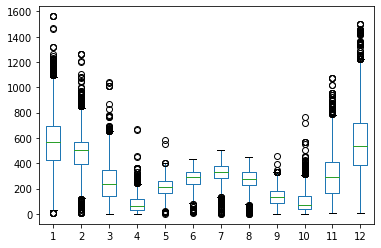

In [501]:
master1.pivot_table(values='DD_monthly',
    index='ID',
    columns=['month']).plot(kind='box')

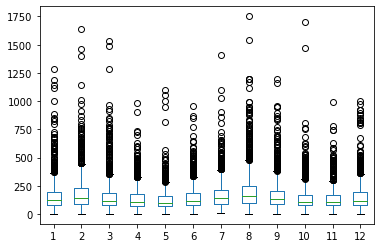

In [570]:
master1.pivot_table(values='elec_use',
    index='ID',
    columns=['month']).plot(kind='box')

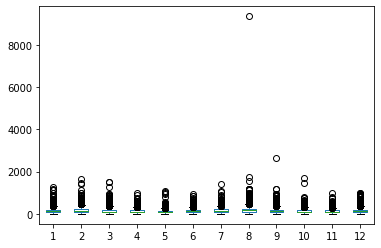

In [502]:
master1.pivot_table(values='elec_use',
    index='ID',
    columns=['month']).plot(kind='box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c288cbcc0>,
      dtype=object)

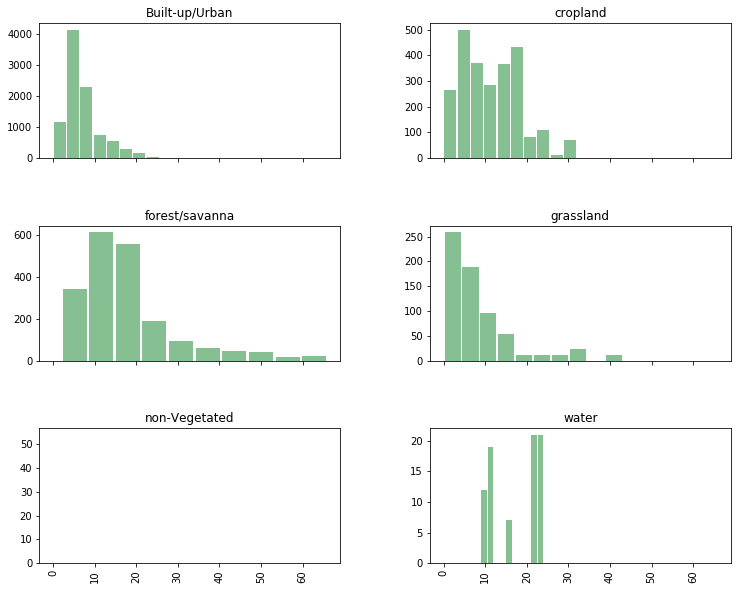

In [280]:
master1.hist(column='Tree_Cover', by='LC_Type3', grid=False, figsize=(12,10), layout=(3,2),
             sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

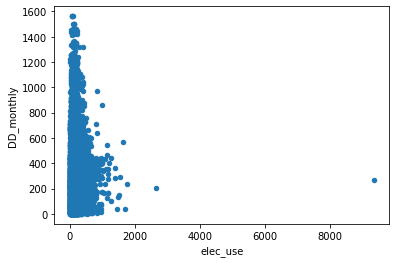

In [503]:
master1.plot(x='elec_use', y='DD_monthly', kind='scatter')

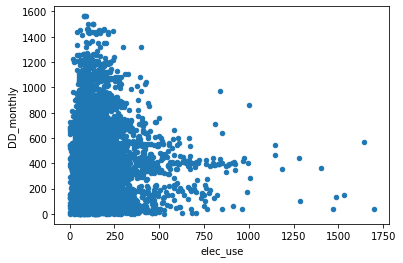

In [504]:
master1[~master1.is_summer].plot(x='elec_use', y='DD_monthly', kind='scatter')

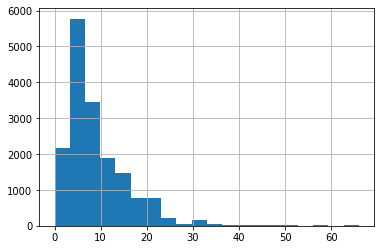

In [505]:
master1.Tree_Cover.hist(grid=True, bins=20)

#### outliers in `elec_use`

In [506]:
master1.elec_use.quantile(.999)

1195.0359

In [507]:
master1[master1.elec_use > 1500]

,ID,month,elec_use,elec_bill,Month,serial,province,city,county,zipcode,...,is_new,sf,Vege_Cover,LC_Type2s,LC_Type3,LC_Type4,LC_Type5,DD_sq,city_,county_
2335,195,8,9345.0,195.000000,8,2.010202e+17,吉林,白城,镇贵,137300,...,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,70230.140625,白城,镇贵
3187,266,8,1545.0,902.590027,8,2.011201e+17,重庆,江北区,大石坝,400021,...,1.0,0.0,86.0,Mixed forest,forest/savanna,vege,natural_vege,85269.187500,重庆,大石坝
4868,406,9,2641.0,1513.290039,9,2.011201e+17,湖北,武汉市,武昌区,430071,...,1.0,0.0,32.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,42843.546875,武汉市,武昌区
7873,657,2,1642.0,919.520020,2,2.011201e+17,河南,郑州市,巩义市,451283,...,1.0,1.0,79.0,Cropland,cropland,vege,cropland,320009.656250,郑州市,巩义市
7987,666,8,1752.0,1432.719971,8,2.011201e+17,河南,郑州市,巩义市,451200,...,1.0,0.0,63.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,54887.246094,郑州市,巩义市
14529,1211,10,1698.0,183.000000,10,2.011201e+17,安徽,马鞍山,当涂,243100,...,1.0,1.0,35.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,1756.415771,马鞍山,当涂
15074,1257,3,1529.0,836.169983,3,2.010200e+17,山东,临沂市,兰山区,276003,...,1.0,1.0,64.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,23039.419922,临沂市,兰山区


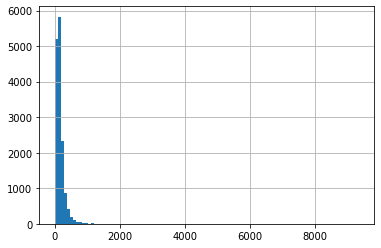

In [508]:
master1.elec_use.hist(grid=True, bins=100)

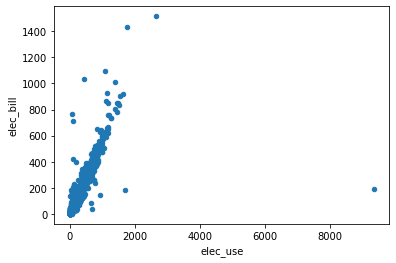

In [509]:
master1.plot(x='elec_use', y='elec_bill', kind='scatter')

In [510]:
master1['elec_use'].count()

15104

In [511]:
master1_copy = master1.copy()
master1 = master1[master1['elec_use']<2000]
# note also dropped all NaNs

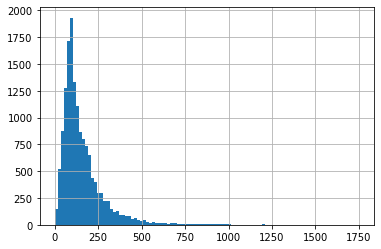

In [512]:
master1.elec_use.hist(grid=True, bins=100)

In [513]:
master1.columns

Index(['ID', 'month', 'elec_use', 'elec_bill', 'Month', 'serial', 'province',
       'city', 'county', 'zipcode', 'respondent', 'latitude', 'longitude',
       'fsize', 'income', 'rltn_to_HoH', 'sex', 'birthyr', 'employment',
       'employer', 'occupation', 'sector', 'ethnicity', 'edu_lvl', 'edu_yrs',
       'mths_at_home', 'urban', 'bldlvl', 'level', 'stories', 'moveinyr',
       'moveinmth', 'daystyd', 'own', 'owntyp', 'bltyr', 'wall', 'roof',
       'height', 'size', 'size2', 'bathroom', 'balcony', 'newwdw', 'window_D',
       'wall_D', 'insltn_D', 'bsmt_D', 'attic_D', 'garage_D', 'dlgt_w',
       'dlgt_s', 'DD_monthly', 'goodday_count', 'LC_Type1', 'LC_Type2',
       'NonTree_Vege', 'NonVege', 'Tree_Cover', 'is_north', 'is_south',
       'summer', 'is_summer', 'new', 'is_new', 'sf', 'Vege_Cover', 'LC_Type2s',
       'LC_Type3', 'LC_Type4', 'LC_Type5', 'DD_sq', 'city_', 'county_'],
      dtype='object')

#####  log transformation

In [514]:
master1['elec_ln'] = np.log1p(master1.elec_use)

/Users/JK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


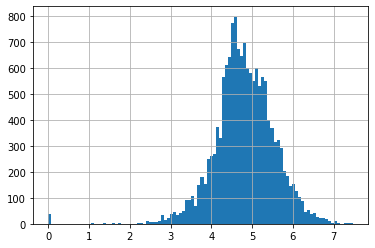

In [516]:
master1['elec_ln'].hist(grid=True, bins=100)

In [164]:
master1.to_csv('master1.csv')

### Models

In [165]:
master = pd.read_stata('master.dta')


In [166]:
master.columns

Index(['ID', 'month', 'elec_use', 'm_elec_use', 'm_elec_use_sum',
       'm_elec_use_tot', 'elec_bill', 'price', 'serial', 'province', 'city',
       'county', 'latitude', 'longitude', 'fsize', 'income', 'urban', 'a2_1_a',
       'a2_1_b', 'a2_1_c', 'a2_1_d', 'a2_1_e', 'a2_1_f', 'a2_1_g', 'a2_1_h',
       'a2_1_i', 'a2_1_j', 'a2_1_k', 'b2', 'b3', 'b4', 'b5', 'b5a', 'b6', 'b7',
       'b8', 'b9', 'new', 'b10', 'b11', 'b12', 'b13', 'b14', 'b16', 'b16a',
       'b16b', 'b16c', 'b17', 'b17a', 'b17b', 'b18', 'b19', 'b19a', 'b19b',
       'b20', 'b20a', 'b20b', 'b21', 'b21a', 'b21b', 'b22', 'b22a', 'b22b',
       'b22c', 'b22d', 'b23', 'b23a', 'b23b', 'b23c', 'b23d', 'b24', 'b24a',
       'b24b', 'b24c', 'b24d', 'b24e', 'b24f', 'b25', 'b26', 'DD_monthly',
       'goodday_count', 'LC_Type1', 'LC_Type2', 'LC_Type3', 'LC_Type5',
       'LC_Type4', 'NonTree_Vege', 'NonVege', 'Tree_Cover', 'province_n',
       'north', 'summer', 'sf', 'DD_sq', 'm_elec_use_temp', '_est_est1'],
      dtype='object'

In [167]:
master['LC_Type3s'] = master['LC_Type2'].replace(LC_Type3_mapper)

In [168]:
pd.crosstab(master['LC_Type3'],master['LC_Type3s'])

LC_Type3s,Built-up/Urban,cropland,forest/savanna,grassland,non-Vegetated,water
LC_Type3,,,,,,
Urban/Built up,11172,0,0,0,0,0
forest/shrubland/savanna,0,0,2232,0,0,0
grassland,0,0,0,744,0,0
cropland,0,2724,0,0,0,0
water,0,0,0,0,0,444
barren,0,0,0,0,84,0


In [169]:

# from linearmodels.datasets import wage_panel

# data = wage_panel.load()
# data = data.set_index(['nr','year'])
# dependent = data.lwage
# exog = sm.add_constant(data[['expersq','married','union']])
# mod = PanelOLS(dependent, exog, entity_effect=True)
# res = mod.fit(cov_type='unadjusted')
# res

In [170]:
master_copy = master.copy()
master = master[master['elec_use']<2000]

In [171]:
pd.crosstab(master['LC_Type3'],master['LC_Type3s'])

LC_Type3s,Built-up/Urban,cropland,forest/savanna,grassland,non-Vegetated,water
LC_Type3,,,,,,
Urban/Built up,9476,0,0,0,0,0
forest/shrubland/savanna,0,0,2007,0,0,0
grassland,0,0,0,680,0,0
cropland,0,2491,0,0,0,0
water,0,0,0,0,0,376
barren,0,0,0,0,72,0


In [172]:
master.shape

(15102, 97)

In [517]:
master1.shape

(15102, 75)

In [174]:
master = master.set_index(['ID','month'])

In [518]:
master1 = master1.set_index(['ID','month'])

In [176]:
master1.loc[([1,],2),:]
#('bar',),

,,elec_use,elec_bill,Month,serial,province,city,county,zipcode,respondent,latitude,...,sf,Vege_Cover,LC_Type2s,LC_Type3,LC_Type4,LC_Type5,DD_sq,city_,county_,elec_ln
ID,month,,,,,,,,,,,,,,,,,,,,,
1,2,461.0,243.550003,2,2.010202e+17,广西,玉林市,容县,537500,1.0,22.860323,...,0.0,44.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,71.346725,玉林市,容县,6.135565


#### cross sectional

In [194]:
master1.income.value_counts(dropna=False)

(3-5] 万        3404
(5-8] 万        3135
(8-12] 万       2627
(1-3] 万        2311
(12-15] 万       926
(15-20] 万       926
(20-25] 万       573
≤1万             447
(25-30] 万       147
(45-50] 万       108
NaN              98
(35-40] 万        88
(30-35]万         82
(40-45] 万        60
(80-120]万        60
(50-80] 万        50
(120-200] 万      48
(200-500] 万      12
Name: income, dtype: int64

In [196]:
master1['size'].value_counts(dropna=False)

(90-120] m2     4063
(120-150] m2    3323
(70-90] m       2647
(50-70] m2      1627
(180-250] m2    1137
(150-180] m2     830
 >250m2          756
(30-50] m2       559
NaN               66
(12-30] m2        58
≤12m2             36
Name: size, dtype: int64

In [197]:
master1['bltyr'].value_counts(dropna=False)

2000-2009    7219
1990-1999    4538
1980-1989    1962
2010年及以后      753
1970-1979     360
1960-1969     106
NaN            67
早于1949年        67
1949-1959      30
Name: bltyr, dtype: int64

In [198]:
master1['urban'].value_counts(dropna=False)

城市（县级市及以上）    9463
农村            3077
乡镇            2514
NaN             48
Name: urban, dtype: int64

In [199]:
master1['own'].value_counts(dropna=False)

自有     13947
他人      1048
NaN      107
Name: own, dtype: int64

In [572]:
# cs_LC = PooledOLS.from_formula("elec_use ~ 1 + DD_monthly*(LC_Type3) + fsize + C(income) + urban + own + size + bltyr + \
#                                 Month + province", data=master1)
# res_cs_LC = cs_LC.fit()
# print(res_cs_LC)

In [201]:
import statsmodels.formula.api as smf

In [209]:
cs_LC = smf.ols("elec_use ~ 1 + DD_monthly*(LC_Type3) + fsize + C(income) + urban + own + size + bltyr + \
                                C(Month) + province", data=master1, subset=None, drop_cols=None)
res_cs_LC = cs_LC.fit()
print(res_cs_LC.summary())

                            OLS Regression Results                            
Dep. Variable:               elec_use   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     60.38
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:47:45   Log-Likelihood:                -86713.
No. Observations:               14178   AIC:                         1.736e+05
Df Residuals:                   14093   BIC:                         1.742e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [244]:
res_cs_LC_robust = res_cs_LC.get_robustcov_results(cov_type='HC1', use_t=None)

In [246]:
res_cs_LC_robust.cov_kwds

{'use_t': True,
 'adjust_df': False,
 'description': 'Standard Errors are heteroscedasticity robust (HC1)'}

In [247]:
res_cs_LC_robust.cov_params_default

array([[ 2.99107098e+02, -5.80145783e+00, -3.78719032e+00, ...,
         6.31706896e-03, -5.18435454e-02, -1.62940619e+00],
       [-5.80145783e+00,  1.64239050e+01,  7.49221934e+00, ...,
        -9.31208910e-03, -5.37278063e-03,  2.54860790e-01],
       [-3.78719032e+00,  7.49221934e+00,  2.51288967e+01, ...,
        -7.54647841e-03, -1.34764532e-02, -2.40926288e-02],
       ...,
       [ 6.31706896e-03, -9.31208910e-03, -7.54647841e-03, ...,
         6.98065082e-04,  2.14604118e-05, -4.57042235e-04],
       [-5.18435454e-02, -5.37278063e-03, -1.34764532e-02, ...,
         2.14604118e-05,  2.49295652e-03, -1.34767791e-03],
       [-1.62940619e+00,  2.54860790e-01, -2.40926288e-02, ...,
        -4.57042235e-04, -1.34767791e-03,  9.88581755e-01]])

In [249]:
print(res_cs_LC_robust.summary())

                            OLS Regression Results                            
Dep. Variable:               elec_use   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     51.07
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:19:50   Log-Likelihood:                -86713.
No. Observations:               14178   AIC:                         1.736e+05
Df Residuals:                   14093   BIC:                         1.742e+05
Df Model:                          84                                         
Covariance Type:                  HC1                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### Panel with LandCover

In [177]:
base_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', data=master)

print(base_LC.fit())

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0090
Estimator:                   PanelOLS   R-squared (Between):             -0.0118
No. Observations:               14477   R-squared (Within):               0.0090
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0016
Time:                        13:18:46   Log-likelihood                -8.292e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.712
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,13090)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.712
                            

In [178]:
# master1
base_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', data=master1)
res_base_LC = base_LC.fit()
print(res_base_LC)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0090
Estimator:                   PanelOLS   R-squared (Between):             -0.0118
No. Observations:               14477   R-squared (Within):               0.0090
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0016
Time:                        13:18:47   Log-likelihood                -8.292e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.712
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,13090)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.712
                            

In [179]:
# no EntityEffects, same as pooledOLS

In [180]:
base_LC_ = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3)', data=master1)

print(base_LC_.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0096
Estimator:                   PanelOLS   R-squared (Between):              0.0014
No. Observations:               14477   R-squared (Within):              -0.0005
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0096
Time:                        13:18:48   Log-likelihood                -9.078e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.331
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,14470)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             23.331
                            

##### Try PooledOLS

In [181]:
from linearmodels.panel import PooledOLS

In [182]:
base_LC_pool = PooledOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3)', data=master1)
res_base_LC_pool = base_LC_pool.fit()
print(res_base_LC_pool)

                          PooledOLS Estimation Summary                          
Dep. Variable:               elec_use   R-squared:                        0.0096
Estimator:                  PooledOLS   R-squared (Between):              0.0014
No. Observations:               14477   R-squared (Within):              -0.0005
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0096
Time:                        13:18:49   Log-likelihood                -9.078e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.331
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,14470)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             23.331
                            

##### Try DD_monthly * LC_Type2

In [183]:
base_LC_star = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly * (LC_Type3) + EntityEffects',
                                     drop_absorbed=True, data=master1)
res_base_LC_star = base_LC_star.fit()
print(res_base_LC_star)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0090
Estimator:                   PanelOLS   R-squared (Between):             -0.0118
No. Observations:               14477   R-squared (Within):               0.0090
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0016
Time:                        13:18:50   Log-likelihood                -8.292e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.712
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,13090)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.712
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

LC_Type3[T.cropland], LC_Type3[T.forest/savanna], LC_Type3[T.grassland], LC_Type3[T.non-Vegetated], LC_Type3[T.water]

  AbsorbingEffectWarning,


##### Try province dummy

In [184]:
base_LC_prov = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) +province + EntityEffects',
                                     drop_absorbed=True, data=master1)
res_base_LC_prov = base_LC_prov.fit()
print(res_base_LC_prov)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0090
Estimator:                   PanelOLS   R-squared (Between):             -0.0118
No. Observations:               14477   R-squared (Within):               0.0090
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0016
Time:                        13:18:51   Log-likelihood                -8.292e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.712
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,13090)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.712
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

province[T.云南], province[T.内蒙古], province[T.北京], province[T.吉林], province[T.四川], province[T.天津], province[T.宁夏回族自治区], province[T.安徽], province[T.山东], province[T.山西], province[T.广东], province[T.广西], province[T.新疆], province[T.江西], province[T.河北], province[T.河南], province[T.浙江], province[T.海南], province[T.湖北], province[T.湖南], province[T.甘肃], province[T.福建], province[T.贵州], province[T.辽宁], province[T.重庆], province[T.黑龙江]

  AbsorbingEffectWarning,


##### Try Random Effects

In [185]:
from linearmodels.panel import RandomEffects

In [187]:
base_LC_RE = RandomEffects.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) +province ',
                                      data=master1)
res_base_LC_RE = base_LC_RE.fit()
print(res_base_LC_RE)

                        RandomEffects Estimation Summary                        
Dep. Variable:               elec_use   R-squared:                        0.0521
Estimator:              RandomEffects   R-squared (Between):              0.2145
No. Observations:               14477   R-squared (Within):               0.0089
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.1291
Time:                        13:18:53   Log-likelihood                -8.362e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      24.831
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                F(32,14444)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             15.034
                            

In [188]:
res_base_LC_RE.variance_decomposition

Effects                   10698.616424
Residual                   6123.841704
Percent due to Effects        0.635972
Name: Variance Decomposition, dtype: float64

##### Compare Results

In [260]:
from linearmodels.panel import compare
# print(compare({'Fixed':res_base_LC,'prov':res_base_LC_prov,'star':res_base_LC_star}))

In [190]:
print(compare({'Fixed':res_base_LC,'prov':res_base_LC_prov,'Pool':res_base_LC_pool,'RE':res_base_LC_RE}))

                                            Model Comparison                                            
                                                   Fixed           prov           Pool                RE
--------------------------------------------------------------------------------------------------------
Dep. Variable                                   elec_use       elec_use       elec_use          elec_use
Estimator                                       PanelOLS       PanelOLS      PooledOLS     RandomEffects
No. Observations                                   14477          14477          14477             14477
Cov. Est.                                     Unadjusted     Unadjusted     Unadjusted        Unadjusted
R-squared                                         0.0090         0.0090         0.0096            0.0521
R-Squared (Within)                                0.0090         0.0090        -0.0005            0.0089
R-Squared (Between)                              -0.011

##### Try `LC_Type2s`

In [191]:
base_LC2 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type2s) + EntityEffects', data=master1)

print(base_LC2.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0112
Estimator:                   PanelOLS   R-squared (Between):             -0.0101
No. Observations:               14477   R-squared (Within):               0.0112
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0019
Time:                        13:18:55   Log-likelihood                 -8.29e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.417
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                F(11,13085)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             13.417
                            

##### w/ Log `elec_use`

In [192]:
base_LC_ln = PanelOLS.from_formula('elec_ln ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', data=master1)

print(base_LC_ln.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                elec_ln   R-squared:                        0.0089
Estimator:                   PanelOLS   R-squared (Between):             -0.0047
No. Observations:               14477   R-squared (Within):               0.0089
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0045
Time:                        13:18:56   Log-likelihood                   -7449.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.486
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(6,13090)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.486
                            

#### baseline with NonVege and VegeCover

In [261]:

base_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', data=master)
print(base_NV.fit())

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0074
Estimator:                   PanelOLS   R-squared (Between):             -0.0122
No. Observations:               14375   R-squared (Within):               0.0074
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0015
Time:                        19:37:42   Log-likelihood                -8.233e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      48.255
Entities:                        1371   P-value                           0.0000
Avg Obs:                       10.485   Distribution:                 F(2,13002)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             48.255
                            

In [262]:

base_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', data=master1)
print(base_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0074
Estimator:                   PanelOLS   R-squared (Between):             -0.0122
No. Observations:               14375   R-squared (Within):               0.0074
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0015
Time:                        19:37:42   Log-likelihood                -8.233e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      48.255
Entities:                        1371   P-value                           0.0000
Avg Obs:                       10.485   Distribution:                 F(2,13002)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             48.255
                            

In [263]:
# Vege_Cover
base_VC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:Vege_Cover + EntityEffects', data=master1)
print(base_VC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0074
Estimator:                   PanelOLS   R-squared (Between):             -0.0122
No. Observations:               14375   R-squared (Within):               0.0074
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0015
Time:                        19:37:43   Log-likelihood                -8.233e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      48.255
Entities:                        1371   P-value                           0.0000
Avg Obs:                       10.485   Distribution:                 F(2,13002)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             48.255
                            

In [264]:
base_VC_ln = PanelOLS.from_formula('elec_ln ~ 1 + DD_monthly + DD_monthly:Vege_Cover + EntityEffects', data=master1)
print(base_VC_ln.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                elec_ln   R-squared:                        0.0079
Estimator:                   PanelOLS   R-squared (Between):             -0.0036
No. Observations:               14375   R-squared (Within):               0.0079
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0056
Time:                        19:37:43   Log-likelihood                   -7422.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      51.598
Entities:                        1371   P-value                           0.0000
Avg Obs:                       10.485   Distribution:                 F(2,13002)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             51.598
                            

#### Summer

DD at 0.1469, grassland and cropland signi positive, forest/savanna signi and positive

In [265]:
summer_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(LC_Type3) + EntityEffects', 
                                  data=master[master['summer']==1])

print(summer_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0465
Estimator:                   PanelOLS   R-squared (Between):              0.0122
No. Observations:                7295   R-squared (Within):               0.0465
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0340
Time:                        19:37:43   Log-likelihood                -4.103e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      48.015
Entities:                        1380   P-value                           0.0000
Avg Obs:                       5.2862   Distribution:                  F(6,5909)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             48.015
                            

In [266]:
summer_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', 
                                  data=master1[master1['is_summer']])

print(summer_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0465
Estimator:                   PanelOLS   R-squared (Between):              0.0122
No. Observations:                7295   R-squared (Within):               0.0465
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0340
Time:                        19:37:43   Log-likelihood                -4.103e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      48.015
Entities:                        1380   P-value                           0.0000
Avg Obs:                       5.2862   Distribution:                  F(6,5909)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             48.015
                            

##### NonVege

In [267]:
summer_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master[master['summer']==1])
print(summer_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0429
Estimator:                   PanelOLS   R-squared (Between):              0.0087
No. Observations:                7244   R-squared (Within):               0.0429
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0319
Time:                        19:37:43   Log-likelihood                -4.076e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      131.45
Entities:                        1370   P-value                           0.0000
Avg Obs:                       5.2876   Distribution:                  F(2,5872)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             131.45
                            

In [268]:
summer_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master1[master1['is_summer']])
print(summer_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0429
Estimator:                   PanelOLS   R-squared (Between):              0.0087
No. Observations:                7244   R-squared (Within):               0.0429
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0319
Time:                        19:37:44   Log-likelihood                -4.076e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      131.45
Entities:                        1370   P-value                           0.0000
Avg Obs:                       5.2876   Distribution:                  F(2,5872)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             131.45
                            

#### Winter

DD at 0.026, only forest/savanna signi and positive

In [269]:
winter_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(LC_Type3) + EntityEffects', 
                                  data=master[master['summer'] != 1])

print(winter_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0086
Estimator:                   PanelOLS   R-squared (Between):             -0.0230
No. Observations:                7182   R-squared (Within):               0.0086
Date:                Wed, Mar 18 2020   R-squared (Overall):             -0.0111
Time:                        19:37:44   Log-likelihood                -4.024e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.3597
Entities:                        1381   P-value                           0.0000
Avg Obs:                       5.2006   Distribution:                  F(6,5795)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             8.3597
                            

In [270]:
winter_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', 
                                  data=master1[~master1['is_summer']])

print(winter_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0086
Estimator:                   PanelOLS   R-squared (Between):             -0.0230
No. Observations:                7182   R-squared (Within):               0.0086
Date:                Wed, Mar 18 2020   R-squared (Overall):             -0.0111
Time:                        19:37:44   Log-likelihood                -4.024e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.3597
Entities:                        1381   P-value                           0.0000
Avg Obs:                       5.2006   Distribution:                  F(6,5795)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             8.3597
                            

##### NonVege

In [271]:
winter_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master[master['summer']==0])
print(winter_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0072
Estimator:                   PanelOLS   R-squared (Between):             -0.0153
No. Observations:                7131   R-squared (Within):               0.0072
Date:                Wed, Mar 18 2020   R-squared (Overall):             -0.0044
Time:                        19:37:44   Log-likelihood                -3.995e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.826
Entities:                        1371   P-value                           0.0000
Avg Obs:                       5.2013   Distribution:                  F(2,5758)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             20.826
                            

In [272]:
winter_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master1[~master1['is_summer']])
print(winter_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0072
Estimator:                   PanelOLS   R-squared (Between):             -0.0153
No. Observations:                7131   R-squared (Within):               0.0072
Date:                Wed, Mar 18 2020   R-squared (Overall):             -0.0044
Time:                        19:37:44   Log-likelihood                -3.995e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.826
Entities:                        1371   P-value                           0.0000
Avg Obs:                       5.2013   Distribution:                  F(2,5758)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             20.826
                            

#### North China

DD at 0.0168, LC nothing is significant, all negative

In [273]:
pd.crosstab(master1.is_north, master1.LC_Type3, margins=True)

LC_Type3,Built-up/Urban,cropland,forest/savanna,grassland,non-Vegetated,water,All
is_north,,,,,,,
False,3740,1038,1863,0,0,376,7017
True,5736,1453,144,680,72,0,8085
All,9476,2491,2007,680,72,376,15102


In [274]:
master1.groupby('is_north')['elec_use'].describe()

,count,mean,std,min,25%,50%,75%,max
is_north,,,,,,,,
False,7017.0,174.273087,153.558212,0.0,76.000000,128.0,225.0,1698.0
True,8085.0,142.754272,105.668137,0.0,83.290001,115.0,174.0,1752.0


is_north
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Tree_Cover, dtype: object

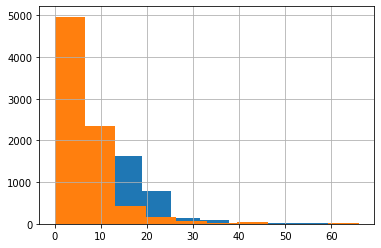

In [275]:
master1.groupby('is_north')['Tree_Cover'].hist()

In [276]:
import pandas as pd

In [277]:
pd.__version__

'1.0.2'

In [278]:
master1.LC_Type3.dtype

dtype('O')

In [279]:
master.LC_Type3.dtype

CategoricalDtype(categories=['Urban/Built up', 'forest/shrubland/savanna', 'grassland',
                  'cropland', 'water', 'barren'],
                 ordered=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c288cbcc0>,
      dtype=object)

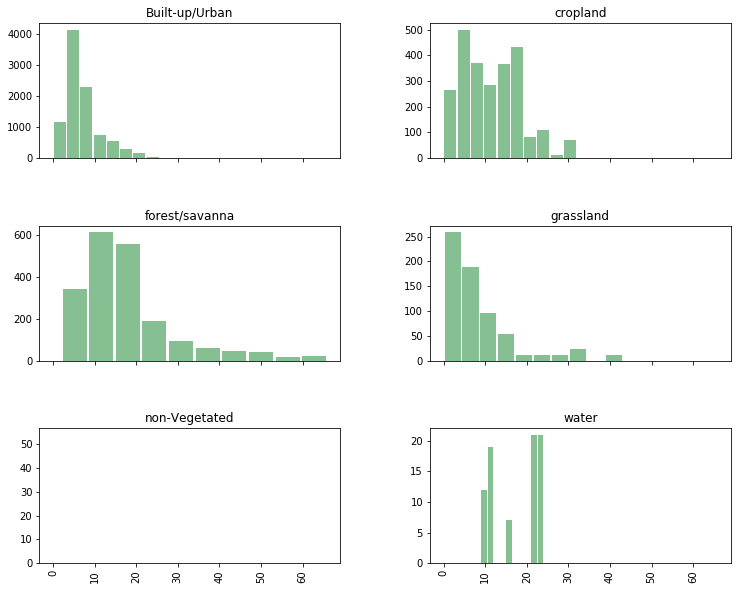

In [280]:
master1.hist(column='Tree_Cover', by='LC_Type3', grid=False, figsize=(12,10), layout=(3,2),
             sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

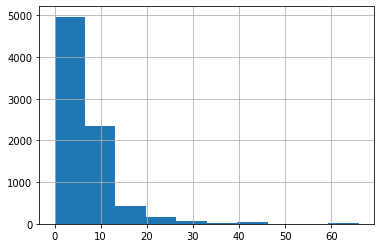

In [287]:
master1[master1.is_north]['Tree_Cover'].hist()

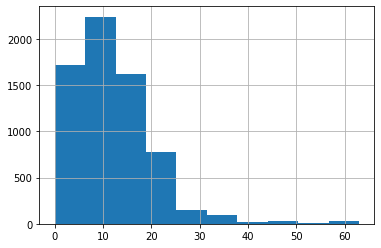

In [288]:
master1[~master1.is_north]['Tree_Cover'].hist()

From the table above, we could see there's a huge discrepancy in the distribution of forest and grassland across north vs south China. All the grasslands are in the north and almost all the forest/savannas are in the south. Therefore, the coefficient of grassland and forest could be driven by the differece in `elec_use`'s response to `DD_monthly` in south vs north China. The base coefficient of DD_montly is 0.1595 in the South and 0.0168 in the North, both higly siginificant.

Combined with regression results from South China, where cropland and forest/savanna are significantly negatively correlated with elec_use, we find that in the north land cover type doesn't have a significant impact on energy use while in the south, Vegetation Cover will significantly reduce the impact of temperature on electricity consumption.

In [289]:
master['LC_Type3'].dtypes

CategoricalDtype(categories=['Urban/Built up', 'forest/shrubland/savanna', 'grassland',
                  'cropland', 'water', 'barren'],
                 ordered=True)

In [290]:
master[master['north']=='North'].LC_Type3.value_counts()

Urban/Built up              5736
cropland                    1453
grassland                    680
forest/shrubland/savanna     144
barren                        72
water                          0
Name: LC_Type3, dtype: int64

In [291]:
master[master['north']=='North'].LC_Type3s.value_counts()

Built-up/Urban    5736
cropland          1453
grassland          680
forest/savanna     144
non-Vegetated       72
Name: LC_Type3s, dtype: int64

In [292]:
north_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type3s + EntityEffects', 
                                 data=master[master['north']=='North'])

print(north_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0035
Estimator:                   PanelOLS   R-squared (Between):             -0.0146
No. Observations:                8077   R-squared (Within):               0.0035
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0016
Time:                        19:41:02   Log-likelihood                -4.475e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.1812
Entities:                         772   P-value                           0.0001
Avg Obs:                       10.462   Distribution:                  F(5,7300)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             5.1812
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [293]:
north_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type3 + EntityEffects', 
                                 data=master1[master1['is_north'] ])

print(north_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0035
Estimator:                   PanelOLS   R-squared (Between):             -0.0146
No. Observations:                8077   R-squared (Within):               0.0035
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0016
Time:                        19:41:05   Log-likelihood                -4.475e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.1812
Entities:                         772   P-value                           0.0001
Avg Obs:                       10.462   Distribution:                  F(5,7300)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             5.1812
                            

##### NonVege

In [294]:
north_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master[master['north']=='North'])
print(north_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0035
Estimator:                   PanelOLS   R-squared (Between):             -0.0136
No. Observations:                8035   R-squared (Within):               0.0035
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0017
Time:                        19:41:28   Log-likelihood                -4.453e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      12.779
Entities:                         768   P-value                           0.0000
Avg Obs:                       10.462   Distribution:                  F(2,7265)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             12.779
                            

In [295]:
north_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master1[master1['is_north'] ])
print(north_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0035
Estimator:                   PanelOLS   R-squared (Between):             -0.0136
No. Observations:                8035   R-squared (Within):               0.0035
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0017
Time:                        19:41:29   Log-likelihood                -4.453e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      12.779
Entities:                         768   P-value                           0.0000
Avg Obs:                       10.462   Distribution:                  F(2,7265)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             12.779
                            

#### South China

DD at 0.1595, cropland and forest all signi and negative

In [296]:
master[master['north']!='North'].LC_Type3.value_counts()

Urban/Built up              3740
forest/shrubland/savanna    1863
cropland                    1038
water                        376
barren                         0
grassland                      0
Name: LC_Type3, dtype: int64

In [297]:
master[master['north']!='North'].LC_Type3s.value_counts()

Built-up/Urban    3740
forest/savanna    1863
cropland          1038
water              376
Name: LC_Type3s, dtype: int64

In [298]:
south_LC3 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type3s + EntityEffects', 
                                 data=master[master['north']!='North'])
print(south_LC3.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0333
Estimator:                   PanelOLS   R-squared (Between):              0.0244
No. Observations:                6400   R-squared (Within):               0.0333
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0399
Time:                        19:41:29   Log-likelihood                -3.765e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      49.760
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.509   Distribution:                  F(4,5787)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             49.760
                            

In [299]:
south_LC3 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type3 + EntityEffects', 
                                 data=master1[~master1['is_north'] ])
print(south_LC3.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0333
Estimator:                   PanelOLS   R-squared (Between):              0.0244
No. Observations:                6400   R-squared (Within):               0.0333
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0399
Time:                        19:41:30   Log-likelihood                -3.765e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      49.760
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.509   Distribution:                  F(4,5787)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             49.760
                            

LC_Type4

In [300]:
master[master['north']!='North'].LC_Type4.value_counts()

0.0    3740
1.0    2901
4.0     376
Name: LC_Type4, dtype: int64

In [301]:
master1[~master1['is_north']].LC_Type4.value_counts()

Built-up/Urban    3740
vege              2901
water              376
Name: LC_Type4, dtype: int64

In [302]:
south_LC4 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(LC_Type4) + EntityEffects', 
                                 data=master[master['north']!='North'])

print(south_LC4.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0331
Estimator:                   PanelOLS   R-squared (Between):              0.0236
No. Observations:                6400   R-squared (Within):               0.0331
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0394
Time:                        19:41:30   Log-likelihood                -3.765e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.116
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.509   Distribution:                  F(3,5788)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             66.116
                            

In [303]:

south_LC4 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type4 + EntityEffects', 
                                 data=master1[~master1['is_north'] ])
print(south_LC4.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0331
Estimator:                   PanelOLS   R-squared (Between):              0.0236
No. Observations:                6400   R-squared (Within):               0.0331
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0394
Time:                        19:41:30   Log-likelihood                -3.765e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.116
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.509   Distribution:                  F(3,5788)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             66.116
                            

##### NonVege

In [304]:
south_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                  data=master[master['north'] !='North'])
print(south_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0314
Estimator:                   PanelOLS   R-squared (Between):              0.0153
No. Observations:                6340   R-squared (Within):               0.0314
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0344
Time:                        19:41:30   Log-likelihood                -3.729e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      92.833
Entities:                         603   P-value                           0.0000
Avg Obs:                       10.514   Distribution:                  F(2,5735)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             92.833
                            

In [305]:
south_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                 data=master1[~master1['is_north'] ])
print(south_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0314
Estimator:                   PanelOLS   R-squared (Between):              0.0153
No. Observations:                6340   R-squared (Within):               0.0314
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0344
Time:                        19:41:31   Log-likelihood                -3.729e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      92.833
Entities:                         603   P-value                           0.0000
Avg Obs:                       10.514   Distribution:                  F(2,5735)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             92.833
                            

NonVege significant in south China not in the north

#### Single Family home, urban home

##### Urban vs Rural

In [306]:
master.urban.dtype

CategoricalDtype(categories=['city', 'town', 'rural'], ordered=True)

In [307]:
master1.urban.dtype

CategoricalDtype(categories=['城市（县级市及以上）', '乡镇', '农村'], ordered=True)

In [308]:
master.urban.value_counts(dropna=False)

city     9463
rural    3077
town     2514
NaN        48
Name: urban, dtype: int64

In [309]:
master1.urban.value_counts(dropna=False)

城市（县级市及以上）    9463
农村            3077
乡镇            2514
NaN             48
Name: urban, dtype: int64

In [310]:
pd.crosstab(master1['urban'], master['urban']) # wrong

urban,city,town,rural
urban,,,
city,9463,0,0
town,0,2514,0
rural,0,0,3077


In [311]:
pd.crosstab(master['urban'],master1['urban']) # wrong

urban,城市（县级市及以上）,乡镇,农村
urban,,,
城市（县级市及以上）,9463,0,0
乡镇,0,2514,0
农村,0,0,3077


In [312]:
urban_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(urban) + DD_monthly:C(LC_Type3) + EntityEffects', 
                                 data=master.dropna(subset=['urban']))

print(urban_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0097
Estimator:                   PanelOLS   R-squared (Between):             -0.0064
No. Observations:               14441   R-squared (Within):               0.0097
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0065
Time:                        19:41:31   Log-likelihood                -8.271e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.016
Entities:                        1378   P-value                           0.0000
Avg Obs:                       10.480   Distribution:                 F(8,13055)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             16.016
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [313]:
urban_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(urban) + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['urban']))

print(urban_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0097
Estimator:                   PanelOLS   R-squared (Between):             -0.0064
No. Observations:               14441   R-squared (Within):               0.0097
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0065
Time:                        19:41:31   Log-likelihood                -8.271e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.016
Entities:                        1378   P-value                           0.0000
Avg Obs:                       10.480   Distribution:                 F(8,13055)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             16.016
                            

##### SF home vs NonSF

In [314]:
master.sf.value_counts(dropna=False)

0.0    10355
1.0     4747
Name: sf, dtype: int64

In [315]:
master1.sf.value_counts(dropna=False)

0.0    10319
1.0     4747
NaN       36
Name: sf, dtype: int64

In [316]:
singlefamily_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(sf) + DD_monthly:C(LC_Type3) + EntityEffects', 
                                 data=master)

print(singlefamily_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0092
Estimator:                   PanelOLS   R-squared (Between):             -0.0072
No. Observations:               14477   R-squared (Within):               0.0092
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0049
Time:                        19:41:32   Log-likelihood                -8.292e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.444
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                 F(7,13089)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.444
                            

In [317]:
# same as if sf is continuous
singlefamily_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(sf) + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['sf']))

print(singlefamily_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0093
Estimator:                   PanelOLS   R-squared (Between):             -0.0072
No. Observations:               14453   R-squared (Within):               0.0093
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0049
Time:                        19:41:32   Log-likelihood                -8.279e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.486
Entities:                        1379   P-value                           0.0000
Avg Obs:                       10.481   Distribution:                 F(7,13067)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.486
                            

    the `sf` variable is hightly corelated with `urban`
so the effect is mostly driven by house being in a urban neighborhood or not

In [318]:
pd.crosstab(master1['sf'],master1['urban'],margins=True)

urban,城市（县级市及以上）,乡镇,农村,All
sf,,,,
0.0,8757,1495,67,10319
1.0,706,1019,3010,4735
All,9463,2514,3077,15054


In [319]:
pd.crosstab(master['sf'],master['urban'],margins=True)

urban,city,town,rural,All
sf,,,,
0.0,8757,1495,67,10319
1.0,706,1019,3010,4735
All,9463,2514,3077,15054


In [320]:
pd.crosstab(master1['sf'],master['sf']) #master1.sf ==0 should be 10319

sf,0.0,1.0
sf,,
0.0,10355,0
1.0,0,4747


In [321]:
pd.crosstab(master['sf'],master1['sf'])

sf,0.0,1.0
sf,,
0.0,10319,0
1.0,0,4747


#### Newer building

In [322]:
master.new.value_counts(dropna=False)

1.0    12510
0.0     2525
NaN       67
Name: new, dtype: int64

In [323]:
master1.new.value_counts(dropna=False)

1.0    12510
0.0     2525
NaN       67
Name: new, dtype: int64

In [324]:
master1.is_new.value_counts(dropna=False)

1.0    12510
0.0     2525
NaN       67
Name: is_new, dtype: int64

In [329]:
newbuilding_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(new) + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master.dropna(subset=['new']))

print(newbuilding_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0091
Estimator:                   PanelOLS   R-squared (Between):             -0.0098
No. Observations:               14422   R-squared (Within):               0.0091
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0032
Time:                        19:43:43   Log-likelihood                -8.261e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.115
Entities:                        1375   P-value                           0.0000
Avg Obs:                       10.489   Distribution:                 F(7,13040)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.115
                            

In [326]:
newbuilding_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:is_new + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['is_new']))

print(newbuilding_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0091
Estimator:                   PanelOLS   R-squared (Between):             -0.0098
No. Observations:               14422   R-squared (Within):               0.0091
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0032
Time:                        19:41:33   Log-likelihood                -8.261e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.115
Entities:                        1375   P-value                           0.0000
Avg Obs:                       10.489   Distribution:                 F(7,13040)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.115
                            

In [327]:
# old 'is_new', w/o NaNs
newbuilding_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:is_new + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['is_new']))

print(newbuilding_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0091
Estimator:                   PanelOLS   R-squared (Between):             -0.0098
No. Observations:               14422   R-squared (Within):               0.0091
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0032
Time:                        19:41:33   Log-likelihood                -8.261e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.115
Entities:                        1375   P-value                           0.0000
Avg Obs:                       10.489   Distribution:                 F(7,13040)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.115
                            

In [328]:
# results different since the "is_new" discrepancy

#### Machine Learning Models

In [330]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
#from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [350]:
to_delete = ['moveinmth','serial','zipcode','elec_ln']

In [546]:
dfml = master1.drop(labels=to_delete,  axis=1, inplace=False)

In [547]:
dfml._get_numeric_data().columns

Index(['elec_use', 'elec_bill', 'Month', 'respondent', 'latitude', 'longitude',
       'fsize', 'birthyr', 'edu_yrs', 'mths_at_home', 'level', 'moveinyr',
       'daystyd', 'owntyp', 'bathroom', 'balcony', 'DD_monthly',
       'goodday_count', 'LC_Type1', 'LC_Type2', 'NonTree_Vege', 'NonVege',
       'Tree_Cover', 'is_north', 'is_south', 'summer', 'is_summer', 'new',
       'is_new', 'sf', 'Vege_Cover', 'DD_sq'],
      dtype='object')

In [522]:
to_convert_category = ['Month','birthyr','moveinyr','owntyp','LC_Type1','LC_Type2']

In [548]:
dfml[to_convert_category] = X[to_convert_category].astype('category')

In [559]:
dfml.dropna(axis=0, how='any', inplace=True)

In [560]:
pd.get_dummies(dfml).head()

elec_use   elec_bill  respondent   latitude   longitude  fsize  \
ID month                                                                   
5  1         265.0  140.000000         1.0  22.857195  110.550453    5.0   
   2         461.0  243.550003         1.0  22.857195  110.550453    5.0   
   3         340.0  179.619995         1.0  22.857195  110.550453    5.0   
   4         243.0  128.380005         1.0  22.857195  110.550453    5.0   
   5         131.0   69.209999         1.0  22.857195  110.550453    5.0   

          edu_yrs  mths_at_home  level  daystyd  ...  county__静安区  \
ID month                                         ...                
5  1         12.0          12.0    3.0      7.0  ...            0   
   2         12.0          12.0    3.0      7.0  ...            0   
   3         12.0          12.0    3.0      7.0  ...            0   
   4         12.0          12.0    3.0      7.0  ...            0   
   5         12.0          12.0    3.0      7.0  ...            0   

          county__项城市  county__顺义区  county__香坊区  county__驿城区  county__高新技术开发区  \
ID month                                                                        
5  1                0            0            0            0                0   
   2                0            0            0            0                0   
   3                0            0            0            0                0   
   4                0            0            0            0                0   
   5                0            0            0            0                0   

          county__鹤城区  county__黄浦区  county__龙华区  county__龙沙区  
ID month                                                      
5  1                0            0            0            0  
   2                0            0            0            0  
   3                0            0            0            0  
   4                0            0            0            0  
   5                0            0            0            0  

[5 rows x 846 columns]

In [571]:
X.shape

(8861, 844)

In [561]:
X = pd.get_dummies(dfml).iloc[:,2:]

In [562]:
y = pd.get_dummies(dfml).iloc[:,0]

In [563]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.1, random_state=42 )

In [556]:
ml_LR = LinearRegression()

In [564]:
ml_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [567]:
ml_LR.score(X_train, y_train)

0.5276848726100689

In [568]:
ml_LR.score(X_test, y_test)

0.4346199405325565